In [109]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, measure
from scipy import ndimage
import pandas as pd

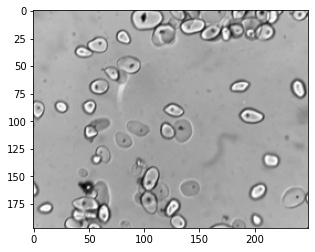

In [110]:
img = cv.imread('Araruta.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blurred = cv.GaussianBlur(img, (5, 5), 0)

plt.imshow(gray, cmap=plt.cm.gray)
plt.show()

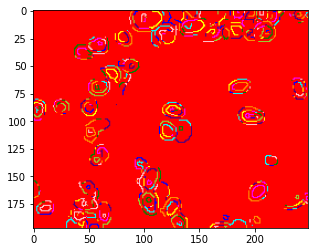

In [111]:
wide = cv.Canny(blurred, 10, 200)
mid = cv.Canny(blurred, 30, 150)
tight = cv.Canny(blurred, 240, 250)

labeled_mask, num_of_labels = ndimage.label(mid)

img2 = color.label2rgb(labeled_mask, bg_label=1, bg_color=(1, 1, 1))
plt.imshow(img2)

In [112]:
grains = measure.regionprops(labeled_mask, gray)
data = [(g.label, g.area) for g in grains]
df = pd.DataFrame(data, columns=['label', 'area'])



# A area maior corresponde ao espaço em branco
df

,label,area
0,1,1
1,2,8
2,3,37
3,4,1
4,5,2
...,...,...
636,637,3
637,638,1
638,639,5
639,640,4


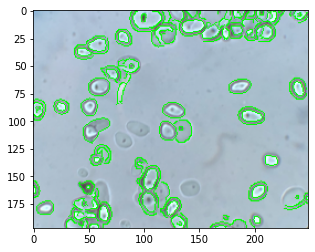

In [113]:
contours, hierarchy = cv.findContours(mid, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
cv.drawContours(img, contours, -1, (0, 255, 0), 1)


plt.imshow(img)

# New section